In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Finnish lakes data
lake = pd.read_csv('Data/Lake Data.txt', sep = '\t')

In [3]:
lake.head()

,Number,TP,Status,TN,TN.TP,Chl.a,pH,Secchi.Depth,Temperature,Latitude,Longitude,Cyanobacteria,Anabaena,Microcystis,MicrocystisDicot
0,12,24,Mesotrophic,440,11.0,12.0,8.0,2.2,20.4,61.01,22.12,0.0480,0.003,0.000,No
1,54,20,Mesotrophic,840,42.0,18.0,6.9,1.2,18.8,61.46,23.02,0.2184,0.058,0.000,No
2,15,8,Oligotrophic,370,46.3,3.2,7.0,5.3,18.5,61.03,23.15,0.0165,0.002,0.000,No
3,23,67,Eutrophic,990,14.8,36.0,7.4,0.4,19.4,61.24,23.19,0.0718,0.000,0.000,No
4,44,39,Eutrophic,810,20.8,26.0,8.9,0.5,20.1,60.50,23.29,0.3256,0.070,0.018,Yes


## Bivariate correlations bewteen numeric variables

<Axes: >

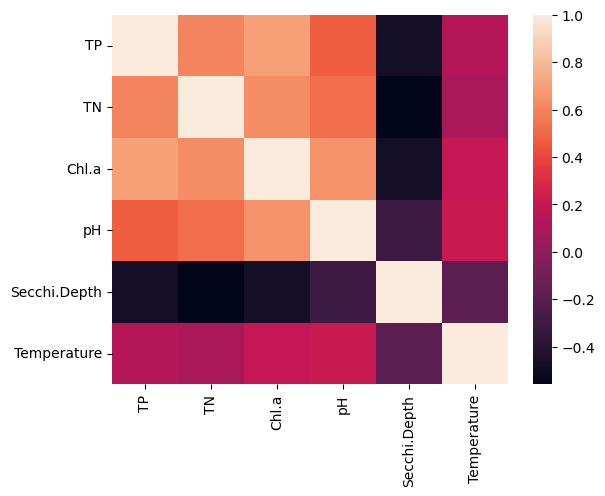

In [4]:
# Create a heatmap using the correlation coefficient of all the numeric variables
lake_subset = lake[['TP', 'TN', 'Chl.a', 'pH', 'Secchi.Depth', 'Temperature']]
c = lake_subset.corr()
sns.heatmap(c)

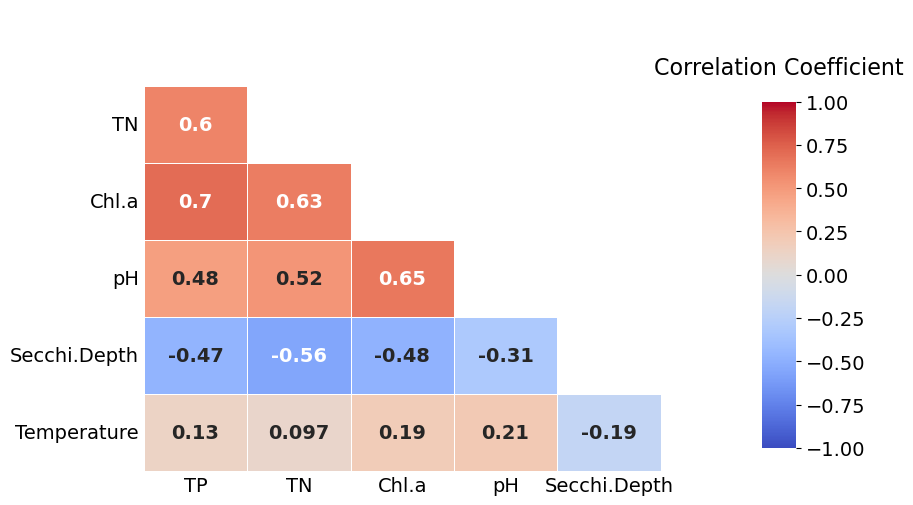

In [5]:
# Let's fix the heatmap
# We want values in the middle, bolded.
# Show just the lower triangular matrix.
# Pick a colormap.
# Play with the 'cbar_kws'.
# 'linewidth' sets the gap between rows.
plt.figure(figsize = [10,6])
mask = np.triu(c)
sns.heatmap(c, 
            annot = True, 
            mask = mask, 
            cmap = 'coolwarm', 
            vmin = -1, 
            vmax = 1,
            linewidth = 0.5, 
            annot_kws={'fontsize':14, 'weight':'bold'}, 
            cbar_kws={'shrink':0.75,
                      'aspect':10,
                      'anchor':(-0.5,0.2)
                     }
           )
ax = plt.gca()

# Let's fix the labels 
# We can make the font larger and remove the redundant labels
ax.set_yticks(ax.get_yticks()[1:], labels = c.columns[1:], size = 14)
ax.set_xticks(ax.get_xticks()[:-1], labels = c.columns[:-1], size = 14, rotation = 0)
ax.tick_params(length = 0)

# Format the colorbar
# Make the colorbar smaller
cbar = ax.collections[0].colorbar
ticklabs = cbar.ax.get_ymajorticklabels()
cbar.ax.tick_params(labelsize = 14)
cbar.ax.set_title('Correlation Coefficient', fontsize = 16, pad = 20)

plt.show()

# Scatterplots

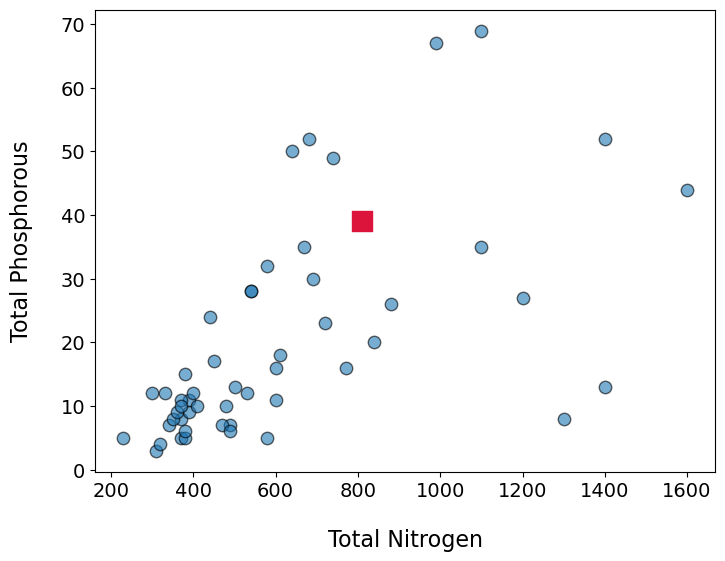

In [6]:
# Create a scatterplot using 'TN' and 'TP'.
# See if we can differentiate 'number = 44'.
plt.figure(figsize = [8,6])

lake_44 = lake[lake['Number'] == 44] # What can we do with this?
plt.scatter(lake['TN'], lake['TP'], s = 80, alpha = 0.6, ec = 'k')
plt.scatter(lake_44['TN'], lake_44['TP'], s = 200, color = 'crimson', marker = 's')

plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.xlabel('Total Nitrogen', fontsize = 16, labelpad = 20)
plt.ylabel('Total Phosphorous', fontsize = 16, labelpad = 20)
plt.show()

## What if we want to shade in points by trophic status?

Consider the code below and the scatterplot it attempts to make. Based on what you see, answer the questions.
 
1) Look at the code for the legend: How did we get the entries to appear horizontally? What happens if you change markerscale to 4? What if you change handletextpad to 10? How do we center the legend?  
2) How do we add a vertical or horizontal line to the plot?  
3) Why are there blank points instead of circled points? Consider the logic of drawing circles around the points with the code as written.  

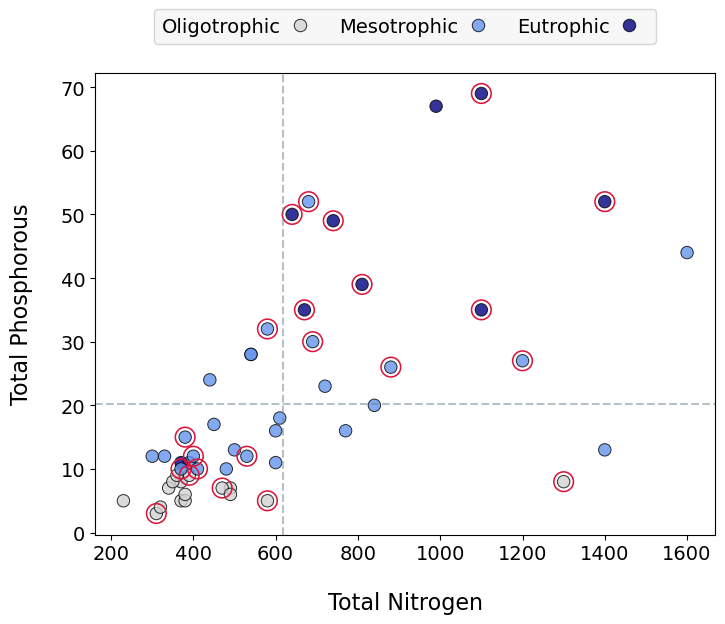

In [7]:
# How do these relate to lake status? We'd like to shade in the points by group
lake['Status'] = pd.Categorical(lake['Status'], ordered=True, categories = ['Oligotrophic','Mesotrophic','Eutrophic'])

plt.figure(figsize = [8,6])
# Plot the points
ax = sns.scatterplot(data = lake, x = 'TN', y = 'TP',s = 80, alpha = 0.8, ec = 'k', hue = 'Status',
                    palette = ['lightgrey','cornflowerblue','navy'])

# Suppose I really, really care about lakes that have microcystis and I want to put a circle around these
micro_yes = lake[lake['MicrocystisDicot'] == 'Yes']
sns.scatterplot(data = micro_yes, x = 'TN', y = 'TP', s = 200, ec = 'crimson', ax = ax,
               color = 'none') # color = 'none' or change the order

plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.xlabel('Total Nitrogen', fontsize = 16, labelpad = 20)
plt.ylabel('Total Phosphorous', fontsize = 16, labelpad = 20)

# Format the legend
plt.legend(fontsize = 14, markerfirst = False, ncol = 3, bbox_to_anchor = [0.5,1.1], markerscale = 1, 
           columnspacing = 1, handletextpad = 0, loc = 'center',
           facecolor = 'whitesmoke')

# I'd like to add a line for the mean of TN and TP
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html
mean_TN = lake['TN'].mean()
mean_TP = lake['TP'].mean()
ax.axvline(mean_TN, linestyle = '--', color = 'slategrey', alpha = 0.5)
ax.axhline(mean_TP, linestyle = '--', color = 'slategrey', alpha = 0.5)

# Save the plot
plt.savefig('Images/Scatter.png',bbox_inches='tight',facecolor='white')
plt.show()

## Making a grid of scatterplots

Consider the code below and the scatterplot it attempts to make. Based on what you see, answer the questions.

1) How does the loop work? How does it know where to put each plot and which variables to use?  
2) What does wspace: 0.2 do?  
3) What does the if i > 1 conditional do?  
4) What does the if i != 1 conditional do?   
5) What does f.transFigure do in the legend code?  
6) Should we set all of the x-axis scales and y-axis scales to be the same on all plots?  

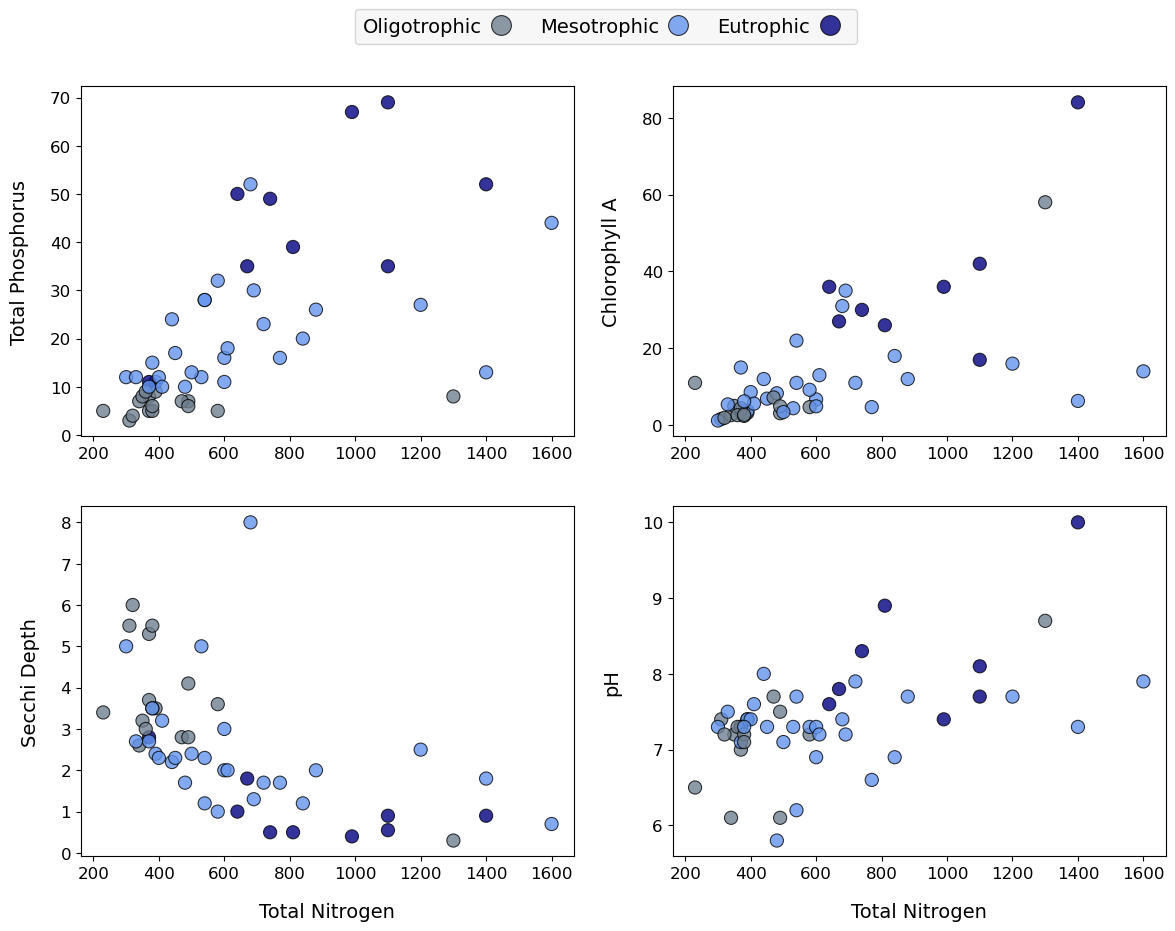

In [8]:
# Create 4 scatterplots in a 2*2 grid, using 'TP', 'Chl.a', 'Secchi.Depth', and 'pH' as y-axis and 'TN' as x-axis.
f, axes = plt.subplots(2,2, figsize = [14,10], gridspec_kw = {'wspace':0.2})
axes = axes.flatten()
# print(axes)

y_var = ['TP', 'Chl.a', 'Secchi.Depth', 'pH']
y_labels = ['Total Phosphorus', 'Chlorophyll A', 'Secchi Depth', 'pH']
x_var = 'TN'

# Loop to create the plots
for i in range(len(axes)):
    sns.scatterplot(data = lake, x = lake[x_var], y = lake[y_var[i]], hue = 'Status',
              palette= ['slategrey','cornflowerblue','navy'], s = 90, alpha = 0.8, ec = 'k', ax = axes[i])
    
    # What does this do?
    if i > 1:
        axes[i].set_xlabel('Total Nitrogen', fontsize = 14, labelpad = 15)
    else:
        axes[i].set_xlabel('')
    axes[i].set_ylabel(y_labels[i], fontsize = 14, labelpad = 15)
    axes[i].tick_params(labelsize = 12)
    
    # # What does this do?
    if i != 1:
        axes[i].get_legend().remove()
    else:
        axes[i].legend(fontsize = 14, markerfirst = False, ncol = 3, bbox_to_anchor = [0.5,0.94],
                       markerscale = 1.5, columnspacing = 1, handletextpad = 0, facecolor = 'whitesmoke',
                       bbox_transform = f.transFigure, loc = 'center')
        
plt.savefig('Images/GridScatter.png',bbox_inches = 'tight',facecolor='white')
plt.show()

Notes from Class

Try and make legend outside of visualization if possible

axvlines -> verticle lines

axvlines_kwags to input mutliple keyword args

plt.legend -> making your own legend from scratch

Creating patches is making rectangles

handles = [Patch(facecolor, alpha)iterable] #Use list comprehension

When you scale using .fit_transform, you ahve to turn it back into an df

columns = df.columns

Always use tsne if you want to show clustering


# Parallel Coordinates Plot

In [9]:
from pandas.plotting import parallel_coordinates as pcp
from matplotlib.patches import Patch

## Different data set

In [10]:
mic = pd.read_csv('Data/Microbial Data.csv')
mic.head()

,Streptococcus,Veillonella,Prevotella,Pseudomonas,Staphylococcus,CF
0,0.69,0.1023,0.2077,0.00,0.00,COPD
1,0.66,0.1122,0.2278,0.00,0.00,COPD
2,0.74,0.0759,0.1541,0.01,0.02,COPD
3,0.71,0.0924,0.1876,0.01,0.00,COPD
4,0.43,0.1848,0.3752,0.00,0.01,COPD


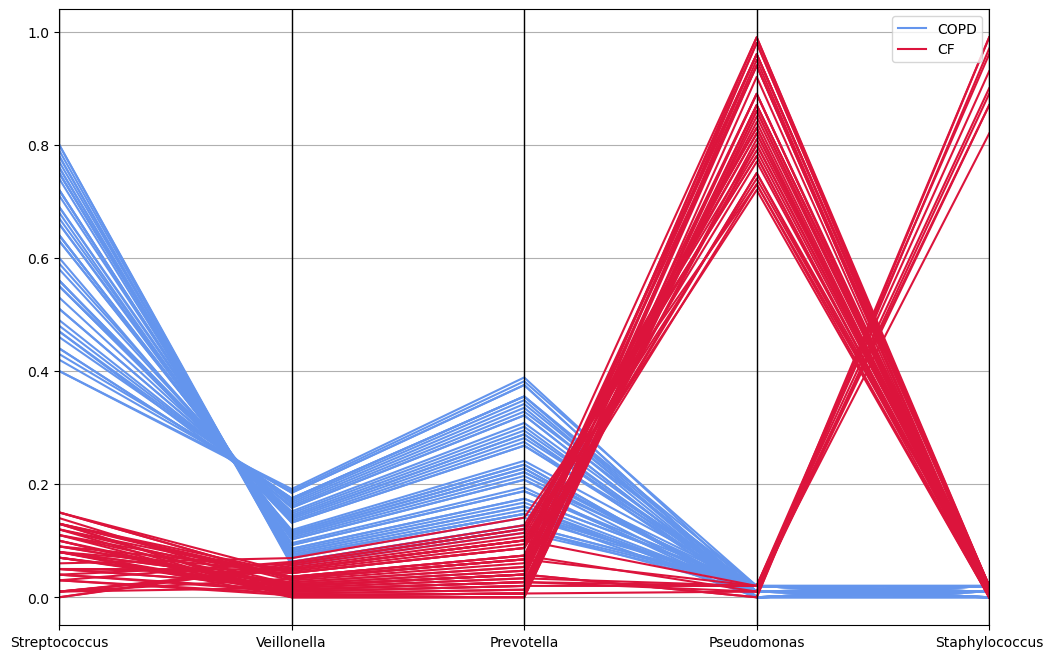

In [11]:
plt.figure(figsize = [12,8])
colors = ['cornflowerblue', 'crimson']
pcp(mic, 'CF', color = colors) # pcp(data_Frame_with_categorical)
plt.show()

Here are a few questions for you about the plot below:  
1) What are the axvlines that the keywords seem to be for? Where are they?  
2) Which gridlines does plt.grid affect?  
3) The Patches that we make for the handles....where do they end up?  
 

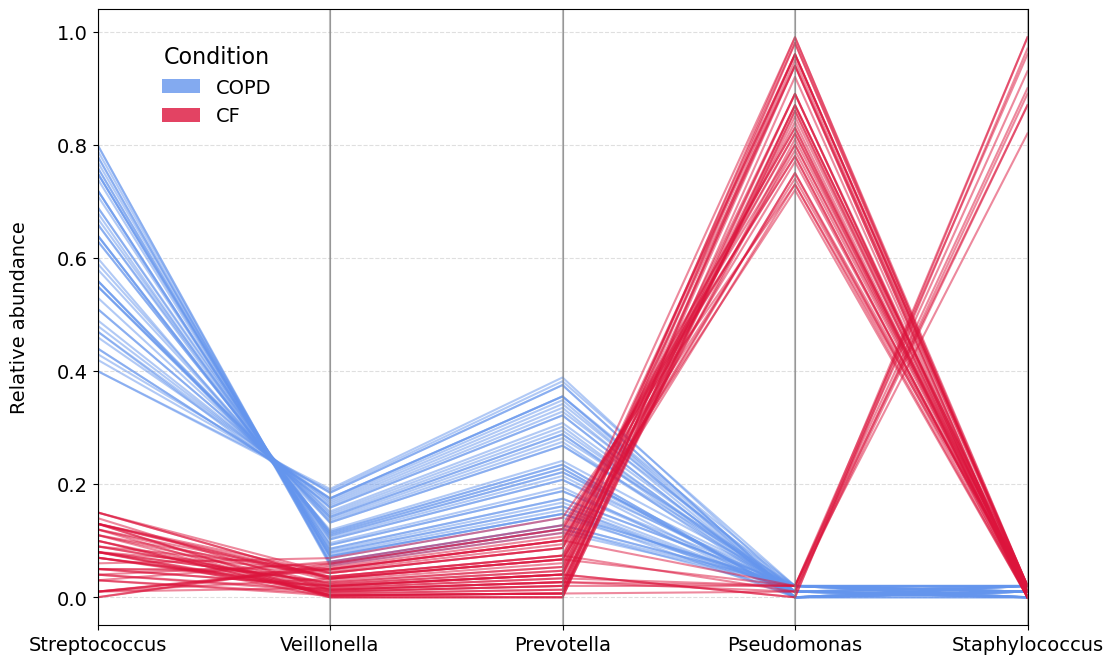

In [12]:
plt.figure(figsize = [12,8])
colors = ['cornflowerblue', 'crimson']
pcp(mic, 'CF', color = colors, alpha = 0.5, axvlines_kwds={'alpha':0.5,'color':'grey'})
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid(axis = 'y', alpha = 0.4, linestyle = '--')
# How to make a fake legend
handles = [Patch(facecolor=c, alpha = 0.8) for c in colors]
plt.legend(handles, ['COPD','CF'], title='Condition',
           bbox_to_anchor=(0.05,0.97), loc='upper left', fontsize = 14, title_fontsize = 16, frameon = False)
plt.ylabel('Relative abundance', fontsize = 14, labelpad = 20)
plt.savefig('Images/PCP.png',bbox_inches ='tight',facecolor='whitesmoke')
plt.show()

Let's make a similar plot for the lake data....what's different? What should we change in terms of truthfulness?

<Axes: >

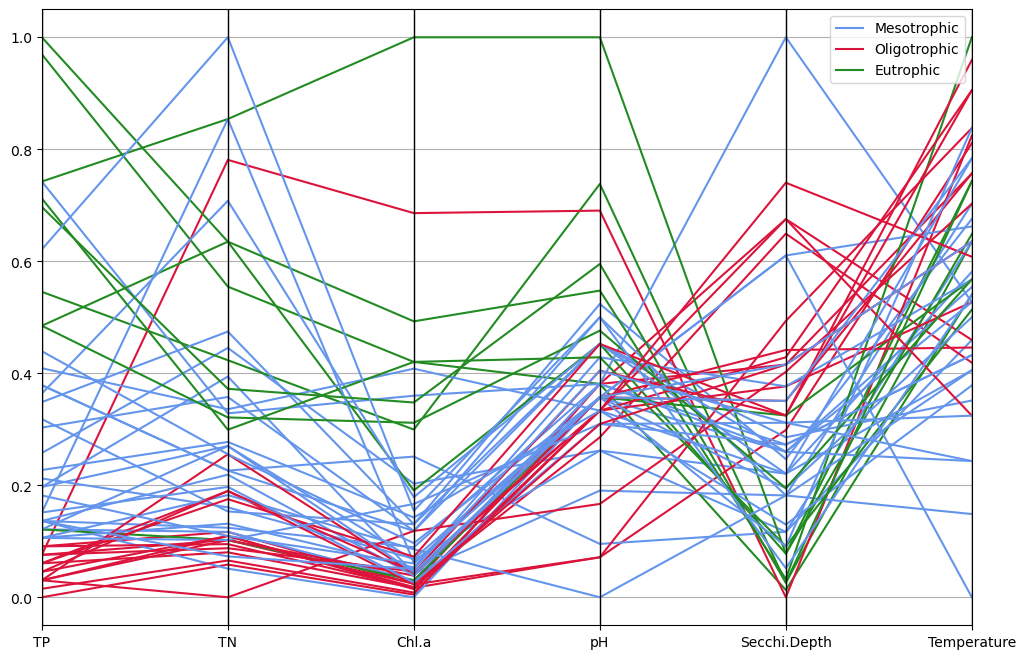

In [13]:
from sklearn.preprocessing import MinMaxScaler as MMS

lake_subset_2 = lake_subset.copy()
lake_subset_2['Status'] = lake['Status']
lake_subset_3 = pd.DataFrame(MMS().fit_transform(lake_subset_2.drop(columns = 'Status')), 
                             columns = lake_subset_2.drop(columns = 'Status').columns)
lake_subset_3['Status'] = lake['Status']
plt.figure(figsize = [12,8])
colors = ['cornflowerblue', 'crimson', 'forestgreen']
# pcp(lake_subset_2, 'Status', color = colors)
pcp(lake_subset_3, 'Status', color = colors)

## A different approach...and a lot more variables

In [14]:
# A lot more variables...use the digits data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits

In [15]:
digits = load_digits()
# How do we get the data
X = digits['data']
y = digits['target']

In [16]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [17]:
y[0:20]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<Figure size 640x480 with 0 Axes>

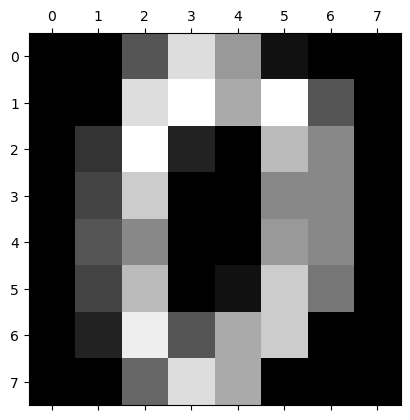

In [18]:
plt.gray()
select = 0 # Corresopnds to data in X[number]
plt.matshow(digits.images[select])
plt.show()

In [19]:
# Create PCA object
pca = PCA(n_components = 2)

In [20]:
pca_digits = pca.fit_transform(X)

In [21]:
# Create a Dataframe
pca_df = pd.DataFrame(pca_digits, columns = ['PC'+str(i) for i in range(1,len(pca_digits[0])+1)])
pca_df['target'] = y

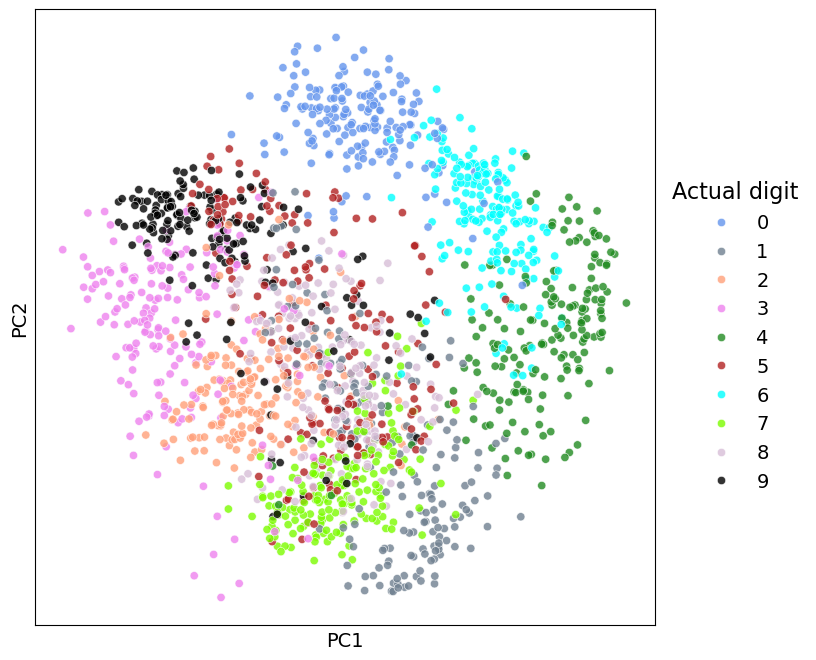

In [22]:
plt.figure(figsize = [8,8])
colors = ['cornflowerblue', 'slategrey','lightsalmon',
          'violet','forestgreen','firebrick', 'cyan',
         'lawngreen','thistle','black']
sns.scatterplot(data = pca_df, x = 'PC1',y = 'PC2', hue = y, palette = colors, alpha = 0.8)
plt.legend(bbox_to_anchor = [1,0.75], title = 'Actual digit', frameon = False, fontsize = 14,
          title_fontsize = 16)
plt.xlabel('PC1', fontsize = 14)
plt.ylabel('PC2', fontsize = 14)
plt.xticks([])
plt.yticks([])
plt.show()

In [23]:
# Create t-SNE object
tsne = TSNE(random_state = 99)

In [24]:
tsne_digits = tsne.fit_transform(X)

In [25]:
tsne_df = pd.DataFrame(tsne_digits, columns = ['TSNE1','TSNE2'])
tsne_df['target'] = y

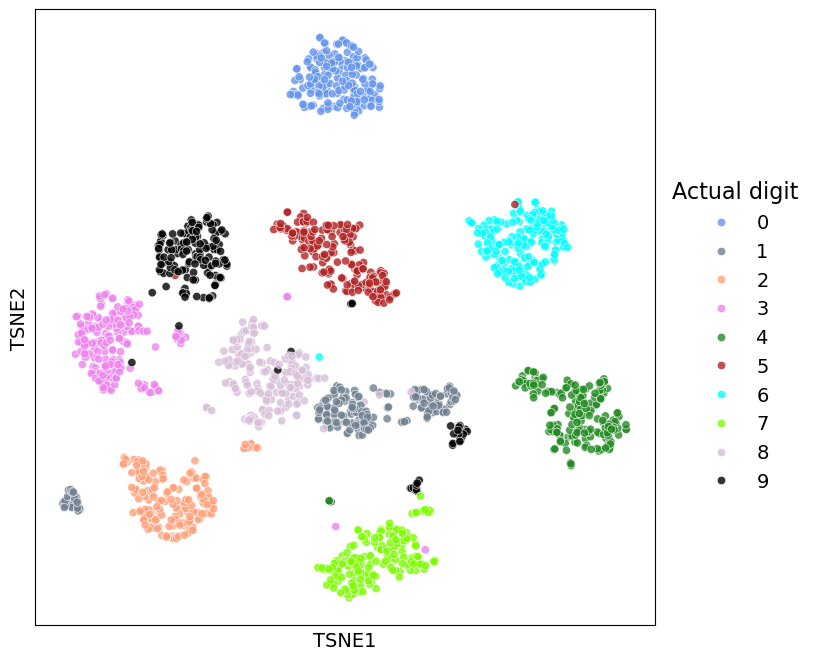

In [26]:
plt.figure(figsize = [8,8])
colors = ['cornflowerblue', 'slategrey','lightsalmon',
          'violet','forestgreen','firebrick', 'cyan',
         'lawngreen','thistle','black']
sns.scatterplot(data = tsne_df, x = 'TSNE1',y = 'TSNE2',hue = y, palette = colors, alpha = 0.8)
plt.legend(bbox_to_anchor = [1,0.75], title = 'Actual digit', frameon = False, fontsize = 14,
          title_fontsize = 16)
plt.xlabel('TSNE1', fontsize = 14)
plt.ylabel('TSNE2', fontsize = 14)
plt.xticks([])
plt.yticks([])
plt.show()